<a href="https://colab.research.google.com/github/MAU143429/IA-Laboratorios/blob/main/Laboratorio_Indices_de_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio – Índices de error

In [1]:
'''
Importando las librerías que nos permiten generar los valores aleatorios
y realizar los calculos.
'''
import random
import decimal
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


1. Genere un set de datos con comportamiento lineal (puede utilizar una librería
para generar este set) de 100 mil datos, calcule la regresión lineal. Puede
reutilizar los datos del lab de Regresión Lineal (5 pts)

Gráfique en 2D las observaciones y sus errores como se muestra en la siguiente
figuera (10 pts)

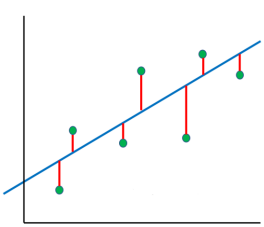


In [21]:
x, y, coef = datasets.make_regression(n_samples=100,
                                      n_features=1,
                                      n_informative=1,
                                      noise=100,
                                      coef=True,
                                      random_state=0) 

X = [item for value in x for item in value]
Y = y.tolist()

DataSet  = []
DataSet.append(X)
DataSet.append(Y)

La ecuación de regresión lineal es: y =  44.72475921130771 x +  -8.141818270307258


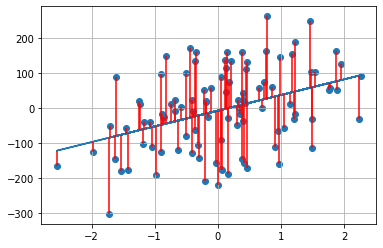

In [41]:
# Algoritmo de Regresión Lineal utilizado en el Lab 1

'''
Método Linear Regression

Este método permite generar una cantidad ¨n¨ de datos aleatorios.

@param n es el numero de tuplas de datos a crear
@return dataSet lista que contiene los datos creados.

'''

def LinearRegresion():
    

    add_xi_yi = 0
    add_xi_xm_2 = 0
    averageWeight = statistics.mean(DataSet[0])
    averageHeight = statistics.mean(DataSet[1])
    
    add_xi_xm = 0
    add_yi_ym = 0
    
    for index, element in enumerate(DataSet[0]):
        
        xi_xm = (element - averageWeight)
        yi_ym = (DataSet[1][index] - averageHeight)
        xi_xm_2 = (xi_xm**2)
        
        add_xi_xm += (xi_xm**2)
        add_yi_ym += (yi_ym**2)
        
        add_xi_yi += xi_xm * yi_ym
        add_xi_xm_2+=xi_xm_2
        
        
    b = add_xi_yi / add_xi_xm_2
    a = averageHeight - (b* averageWeight)
    
    print("La ecuación de regresión lineal es: " + "y = " , b , "x + ", a)
      
    
    (m, b) = np.polyfit(DataSet[0], DataSet[1], 1)
    yp = np.polyval([m,b],DataSet[0])
    plt.plot(DataSet[0], yp)
    plt.grid(True)
    plt.scatter(DataSet[0],DataSet[1])

    for x in range(len(DataSet[0])):
      limit = []
      limit.append((m*DataSet[0][x])+b)
      limit.append(DataSet[1][x])
      plt.vlines(x = DataSet[0][x], color = 'red',ymin = min(limit), ymax = max(limit))


LinearRegresion()

2. Calcule diferentes índices de error sobre la regresión. Los algoritmos deben ser
programados por usted. No se permite que utilice métodos ya programados de
librerías. 

*   Calcule el Error Medio Absoluto (MAE). (20 pts)





*   Calcule el Error Medio Cuadrático (MSE). (20 pts)

*   Calcule el Root Mean Squared Error (RMSE). (20 pts)


Saque conclusiones a partir de los índices de error calculados en este laboratorio.
Sea analítico y extensivo en sus conclusiones.(25 pts)